In [492]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np

In [493]:
def code(img, n=2): # Работает правильно
    img_f = img_as_float(img)
    
    r = img_f[:,:,0]
    g = img_f[:,:,1]
    b = img_f[:,:,2]
    
    #преобразовывваем в y u v 
    y = 0.299 * r  + 0.587 * g  + 0.114 * b
    u = 0 - 0.1687 * r - 0.3313 * g + 0.5 * b + 0.5
    v = 0.5 * r - 0.4187 * g - 0.0813 * b + 0.5
    
    #Создаем массивы уменьшенных размеров
    Cb = np.zeros((y.shape[0]//2 + 1, y.shape[1]//2) , dtype = 'float64')
    Cr = np.zeros((y.shape[0]//2 + 1, y.shape[1]//2), dtype = 'float64')
    
    #Итерируемся по изображению и каждый пиксель "квадрата" размера n^2 делаем равным левому верхнему элементу квадрата
    #И присваеваем новому массиву
    i1 = j1 = -1
    for i in range(0,u.shape[0],n):
        i1 += 1
        for j in range(0,u.shape[1],n):
            j1 += 1
            try: Cb[i1,j1] = u[i,j]; Cr[i1,j1] = v[i,j]
            except: pass
        j1 = -1       
    
    return y,Cb,Cr

In [494]:
def decode(y,Cb_in,Cr_in):
    
    #Создаем массивы размера y
    Cb = np.zeros((y.shape[0],y.shape[1]), dtype = 'float64')
    Cr = np.zeros((y.shape[0],y.shape[1]), dtype = 'float64')
    
    #Присваем части массива размера e1 * e2 значения массива, полученного после децимации
    for i in range(Cb_in.shape[0]):
        e1 = slice(i * 2, i * 2 + 2)
        
        for j in range(Cb_in.shape[1]):
            e2 = slice(j * 2, j * 2 + 2)
            
            Cb[e1,e2],Cr[e1,e2] = Cb_in[i,j],Cr_in[i,j]
    
    
    #преобразовывваем в r g b 
    r = y + 1.402 * (Cr - 0.5)
    g = y - 0.34414 * (Cb - 0.5) - 0.71414 * (Cr - 0.5)
    b = y + 1.772 * (Cb - 0.5) 
    
    return img_as_ubyte(np.clip(np.dstack((r,g,b)),0,1))

In [495]:
img = imread('A2.png')
y,cb,cr = code(img)

In [496]:
res = decode(y,cb,cr)

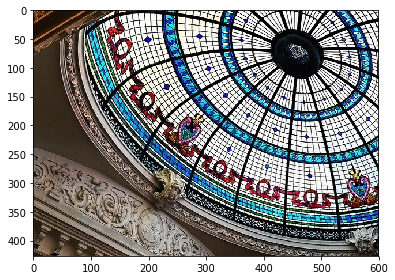

In [497]:
imshow(res)

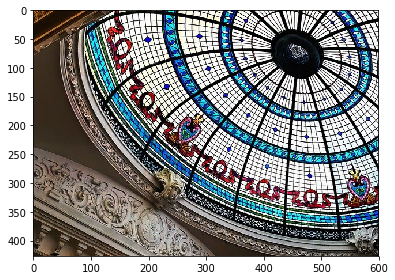

In [498]:
imshow(img)

In [499]:
np.array_equal(img,res)

False

In [500]:
imsave('decimial.png', res)